# Frequency analysis of Rainfall events

## Extract periods with observed rainfall

In [171]:
import numpy as np
import pandas as pd
import array as arr
import matplotlib.pyplot as plt

df = pd.read_csv("BSA_1993TY.txt",sep='\t') 
list(df.columns.values)
#df.day.apply(type)


['name', 'year', 'month', 'day', 'hour', 'minute', 'rainfall']

In [172]:
def consecutivo(mes1,dia1,hora1,mes2,dia2,hora2):
    last_day=[31,28,31,30,31,30,31,31,30,31,30,31] #last day of each month for 1993
    
    if not (mes1==mes2 or mes1+1==mes2):
        return False
    if not (dia1==dia2 or dia1+1==dia2 or (dia1==last_day[mes1-1] and dia2==1)):
        return False
    if not (hora1+1==hora2 or (hora1==23 and hora2==0)):
        return False
    else: 
        return True
        
conteo=[]
rain_no=1
duracion=[]
profundidad=[]

#for indice_f in range(86):
cuantos=1
prof=0
for indice_f in range(df.shape[0]):
    if indice_f==(max(df.shape)-1):
        if consecutivo(df.month[indice_f-1],df.day[indice_f-1],df.hour[indice_f-1],df.month[indice_f],df.day[indice_f],df.hour[indice_f])== True:
            conteo.append(rain_no)
            prof=prof+df.rainfall[indice_f]
            profundidad.append(prof)
            duracion.append(cuantos+1)
        else:
            prof=df.rainfall[indice_f]
            profundidad.append(prof)
            duracion.append(cuantos)
    else:
        if consecutivo(df.month[indice_f],df.day[indice_f],df.hour[indice_f],df.month[indice_f+1],df.day[indice_f+1],df.hour[indice_f+1])== True:
            conteo.append(rain_no)
            prof=prof+df.rainfall[indice_f]
            cuantos=cuantos+1
        else:
            prof=prof+df.rainfall[indice_f]
            profundidad.append(prof)
            duracion.append(cuantos)
            cuantos=1
            prof=0
            #conteo.append(0)
            rain_no=rain_no+1

#print(conteo)
#print(duracion)
#print(profundidad)                 

Text(0, 0.5, 'Rainfall depth (in)')

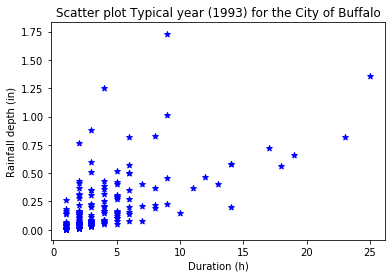

In [173]:
plt.scatter(duracion,profundidad,c='b',marker='*')
plt.title('Scatter plot Typical year (1993) for the City of Buffalo')
plt.xlabel('Duration (h)')
plt.ylabel('Rainfall depth (in)')

## Histogram Analysis

(array([164.,  25.,  25.,  12.,   7.,   9.,   9.,   4.,   5.,   4.,   1.,
          1.,   1.,   1.,   3.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01      , 0.06733333, 0.12466667, 0.182     , 0.23933333,
        0.29666667, 0.354     , 0.41133333, 0.46866667, 0.526     ,
        0.58333333, 0.64066667, 0.698     , 0.75533333, 0.81266667,
        0.87      , 0.92733333, 0.98466667, 1.042     , 1.09933333,
        1.15666667, 1.214     , 1.27133333, 1.32866667, 1.386     ,
        1.44333333, 1.50066667, 1.558     , 1.61533333, 1.67266667,
        1.73      ]),
 <a list of 30 Patch objects>)

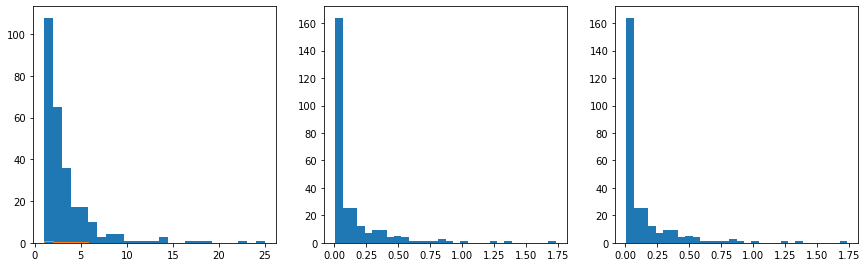

In [185]:
fig = plt.figure(num=None, figsize=(20,20), facecolor='w', edgecolor='k')
############Duration (h) histogram###############
ax = fig.add_subplot(4,4,1)
counts, bins = np.histogram(duracion,bins=25)
ax.hist(bins[:-1], bins, weights=counts)
ax.hist(duracion, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')

############Depth(in) histogram###############
ax = fig.add_subplot(4,4,2)
counts, bins = np.histogram(profundidad,bins=30)
ax.hist(bins[:-1], bins, weights=counts)

############Depth(in) histogram###############
ax = fig.add_subplot(4,4,3)
counts, bins = np.histogram(profundidad,bins=30)
ax.hist(bins[:-1], bins, weights=counts)
